In [1]:
import numpy as np
from qutip import *
#import matplotlib.pyplot as plt

In [2]:
# generating density matrix rho = (1/3) (rho_1 +  rho_2 +  rho_3)
rho_1 = (1/3)*np.array([[1, 1, 1, 0, 0, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

rho_2 = (1/3)*np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, -1, -1, 0, 0],
                  [0, 0, 0, -1, 1, 1, 0, 0],
                  [0, 0, 0, -1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]]) 

rho_3 = (1/2)*np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1]]) 

rho = (1/3)*(rho_1 + rho_2 + rho_3)

# convert rho into a qutip object
rho = Qobj(rho)

rho

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.11111111  0.11111111  0.11111111  0.          0.          0.
   0.          0.        ]
 [ 0.11111111  0.11111111  0.11111111  0.          0.          0.
   0.          0.        ]
 [ 0.11111111  0.11111111  0.11111111  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.11111111 -0.11111111 -0.11111111
   0.          0.        ]
 [ 0.          0.          0.         -0.11111111  0.11111111  0.11111111
   0.          0.        ]
 [ 0.          0.          0.         -0.11111111  0.11111111  0.11111111
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.16666667  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.16666667]]

# Hamiltonian
$H^{(8)} = h \otimes \mathbb I \otimes \mathbb I  + \mathbb I \otimes h \otimes \mathbb I + \mathbb I \otimes\mathbb I \otimes h$,

where $h = \frac{1}{2} (\mathbb I - Z)$

In [118]:
h = np.array([[0, 0],
              [0, 1]])
I = np.array([[1, 0],
              [0, 1]])
H = np.kron(np.kron(h, I), I) + np.kron(np.kron(I, h), I) + np.kron(np.kron(I, I), h)
H = Qobj(H)
H

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3.]]

In [8]:
Energy = np.trace((H * rho).full())
Energy 

(1.611111111111111+0j)

In [9]:
rho_min = (1/6)*np.array([[2, 0, 0, 0, 0, 0, 0, 0],
                    [0, 2, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0]])
Energy_min = np.trace((H * Qobj(rho_min)).full())
Energy_min

(0.6666666666666666+0j)

# Measurement

In [7]:
from qutip.measurement import measure, measurement_statistics

In [5]:
P1 = tensor(ket2dm(bell_state(state='00')), qeye(2))
P2 = tensor(ket2dm(bell_state(state='01')), qeye(2))
P3 = tensor(ket2dm(bell_state(state='10')), qeye(2))
P4 = tensor(ket2dm(bell_state(state='11')), qeye(2))
Projectors = [Qobj(P1.full()), Qobj(P2.full()), Qobj(P3.full()), Qobj(P4.full())]
P1

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0.5]]

In [72]:
collapsed_states, probabilities = measurement_statistics(rho, Projectors)
collapsed_states[1], probabilities

(Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
 Qobj data =
 [[ 0.25  0.1   0.    0.    0.    0.   -0.25 -0.1 ]
  [ 0.1   0.25  0.    0.    0.    0.   -0.1  -0.25]
  [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
  [-0.25 -0.1   0.    0.    0.    0.    0.25  0.1 ]
  [-0.1  -0.25  0.    0.    0.    0.    0.1   0.25]],
 [0.2777777777777779,
  0.2777777777777779,
  0.11111111111111116,
  0.3333333333333335])

In [96]:
P_1 = np.array(P1.full())
P_2 = np.array(P2.full())
P_3 = np.array(P3.full())
P_4 = np.array(P4.full())
rho1 = np.matmul(np.matmul(P_1,np.array(rho.full())),P_1)/np.trace(np.matmul(P_1,np.array(rho.full())))
rho2 = np.matmul(np.matmul(P_2,np.array(rho.full())),P_2)/np.trace(np.matmul(P_2,np.array(rho.full())))
rho3 = np.matmul(np.matmul(P_3,np.array(rho.full())),P_3)/np.trace(np.matmul(P_3,np.array(rho.full())))
rho4 = np.matmul(np.matmul(P_4,np.array(rho.full())),P_4)/np.trace(np.matmul(P_4,np.array(rho.full())))

finalstate = np.trace(np.matmul(P_2,np.array(rho.full()))) * rho2 + np.trace(np.matmul(P_1,np.array(rho.full())))*rho1 + np.trace(np.matmul(P_3,np.array(rho.full())))*rho3 + np.trace(np.matmul(P_4,np.array(rho.full())))*rho4
finalstate

array([[ 0.13888889+0.j,  0.05555556+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.05555556+0.j,  0.13888889+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.11111111+0.j,
         0.05555556+0.j,  0.        +0.j, -0.05555556+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.05555556+0.j,
         0.11111111+0.j, -0.05555556+0.j, -0.11111111+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.05555556+0.j,  0.11111111+0.j,  0.05555556+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, -0.05555556+0.j,
        -0.11111111+0.j,  0.05555556+0.j,  0.11111111+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [97]:
np.linalg.eig(finalstate)[0]

array([1.94444444e-01+0.j, 8.33333333e-02+0.j, 2.90892665e-01+0.j,
       1.11111111e-01+0.j, 4.24406679e-02+0.j, 1.54074396e-33+0.j,
       1.94444444e-01+0.j, 8.33333333e-02+0.j])

In [116]:
rho_average = np.average(collapsed_states, weights=probabilities)
rho_average

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.13888889  0.05555556  0.          0.          0.          0.
   0.          0.        ]
 [ 0.05555556  0.13888889  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.11111111  0.05555556  0.         -0.05555556
   0.          0.        ]
 [ 0.          0.          0.05555556  0.11111111 -0.05555556 -0.11111111
   0.          0.        ]
 [ 0.          0.          0.         -0.05555556  0.11111111  0.05555556
   0.          0.        ]
 [ 0.          0.         -0.05555556 -0.11111111  0.05555556  0.11111111
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.13888889  0.05555556]
 [ 0.          0.          0.          0.          0.          0.
   0.05555556  0.13888889]]

In [125]:
Energy_average = np.trace(np.matmul(H.full(), rho_average.full()))
Energy_average 

(1.5+0j)

In [126]:
eigenvalues = rho_average.eigenenergies()
eigenvalues

array([1.38777878e-17, 4.24406679e-02, 8.33333333e-02, 8.33333333e-02,
       1.11111111e-01, 1.94444444e-01, 1.94444444e-01, 2.90892665e-01])

In [127]:
rho_average_min = np.diag([eigenvalues[7], eigenvalues[6], eigenvalues[5], eigenvalues[3], eigenvalues[4], eigenvalues[2], eigenvalues[1], eigenvalues[0]])
rho_average_min

array([[2.90892665e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.94444444e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.94444444e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.33333333e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.11111111e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.33333333e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.24406679e-02, 0.

In [128]:
Energy_average_min = np.trace((H * Qobj(rho_average_min)).full())
Energy_average_min

(0.9182146691666901+0j)

Convert entangling basis to nonentangling basis before applying Haar random Unitaries. <br> 
U_basis = $ \left(|00>\frac{1}{\sqrt(2)}(<00|+<11|)|+ |01>\frac{1}{\sqrt(2)}(<00|-<11|)|+|10>\frac{1}{\sqrt(2)}(<01|+<10|)|+|11> \frac{1}{\sqrt(2)}(<01|-<10|)|\right) \otimes I_2$

In [52]:
x = np.array(rho_average.full())
U_basis = (1/np.sqrt(2))*np.kron(np.array([[1, 0, 0, 1],[1, 0, 0, -1],[0, 1, 1, 0],[0, 1, -1, 0]]), np.eye(2))
xdiag = np.matmul(np.matmul(U_basis,x), (np.conjugate(U_basis).T))
xdiag = np.round(xdiag,2)

array([[ 0.14+0.j,  0.06+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  +0.j],
       [ 0.06+0.j,  0.14+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.14+0.j,  0.06+0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.06+0.j,  0.14+0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.11+0.j,  0.  +0.j,
        -0.  +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j, -0.  +0.j, -0.  +0.j,
         0.11+0.j,  0.11+0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j, -0.  +0.j, -0.  +0.j,
         0.11+0.j,  0.22+0.j]])

In [62]:
Pdiag_1 = np.kron(np.outer(np.array([1, 0, 0, 0]),np.array([1, 0, 0, 0])), np.eye(2))
Pdiag_2 = np.kron(np.outer(np.array([0, 1, 0, 0]),np.array([0, 1, 0, 0])), np.eye(2))
Pdiag_3 = np.kron(np.outer(np.array([0, 0, 1, 0]),np.array([0, 0, 1, 0])), np.eye(2))
Pdiag_4 = np.kron(np.outer(np.array([0, 0, 0, 1]),np.array([0, 0, 0, 1])), np.eye(2))
#Pdiag = [Pdiag_1, Pdiag_2, Pdiag_3, Pdiag_4]
p1, p2, p3, p4 = np.trace(np.matmul(Pdiag_1, xdiag)), np.trace(np.matmul(Pdiag_2, xdiag)), np.trace(np.matmul(Pdiag_3, xdiag)), np.trace(np.matmul(Pdiag_4, xdiag))

In [64]:
# After applying Haar random unitaries
xdiag_haar = (1/2)*(p1*Pdiag_1 + p2*Pdiag_2 + p3*Pdiag_3 + p4*Pdiag_4)
xdiag_haar

array([[0.13888889+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.13888889+0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.13888889+0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.13888889+0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.05555556+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.05555556+0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.16666667+0.j, 0.

In [99]:
# Applying inverse transformation to get back into the entangled basis
rho_haar = np.round(np.matmul(np.matmul(U_basis.T,xdiag_haar), U_basis), 3)
rho_haar

array([[ 0.139+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j, -0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.139+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j, -0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.111+0.j,  0.   +0.j, -0.056+0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.111+0.j,  0.   +0.j,
        -0.056+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j, -0.056+0.j,  0.   +0.j,  0.111+0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j, -0.056+0.j,  0.   +0.j,
         0.111+0.j,  0.   +0.j,  0.   +0.j],
       [-0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.139+0.j,  0.   +0.j],
       [ 0.   +0.j, -0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.139+0.j]])

In [123]:
#np.trace(np.matmul(H, rho_haar))
np.trace(np.matmul(H.full(), rho_haar))

(1.5+0j)

In [110]:
np.linalg.eig(rho_haar) 

(array([0.167+0.j, 0.055+0.j, 0.167+0.j, 0.055+0.j, 0.139+0.j, 0.139+0.j,
        0.139+0.j, 0.139+0.j]),
 array([[ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j,  1.        +0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j,  1.        +0.j,
          0.        +0.j,  0.        +0.j],
        [ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
          0.70710678+0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j],
        [-0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j],
        [ 0.        +0.j,  0.        +0.j, -0.70710678+0.j,
          0.70

In [112]:
Ugl = (1/np.sqrt(2))*np.array([[0, 0, 1, 0, -1, 0, 0, 0],
                               [0, 0, 0, 1, 0, -1, 0, 0],
                               [1, 0, 0, 0, 0, 0, 1, 0],
                               [1, 0, 0, 0, 0, 0, -1, 0],
                               [0, 1, 0, 0, 0, 0, 0, 1],
                               [0, 1, 0, 0, 0, 0, 0, -1],
                               [0, 0, 1, 0, 1, 0, 0, 0],
                               [0, 0, 0, 1, 0, 1, 0, 0]])
rho_haar_min = np.matmul(np.matmul(Ugl, rho_haar), Ugl.T)
rho_haar_min

array([[ 1.67000000e-01+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -2.65436543e-19+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  1.67000000e-01+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j, -2.65436543e-19+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.39000000e-01+0.j,
        -5.97837465e-19+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j, -5.97837465e-19+0.j,
         1.39000000e-01+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  1.39000000e-01+0.j, -5.97837465e-19+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.000

In [114]:
np.trace(np.matmul(H.full(), rho_haar_min))

(1.2759999999999998+0j)

In [98]:
rho_average_haar = (1/36)*(5*P1+ 5*P2 + 2*P3 + 6*P4)
#Qobj(rho_average_haar)
rho_average_haar

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.13888889  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.13888889  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.11111111  0.         -0.05555556  0.
   0.          0.        ]
 [ 0.          0.          0.          0.11111111  0.         -0.05555556
   0.          0.        ]
 [ 0.          0.         -0.05555556  0.          0.11111111  0.
   0.          0.        ]
 [ 0.          0.          0.         -0.05555556  0.          0.11111111
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.13888889  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.13888889]]

# Ignore the rest for now !

First let us set our Projective measurement operators

In [75]:
# kets in 4-dim Hilbert space
ket00 = basis(4, 0)
ket01 = basis(4, 1)
ket10 = basis(4, 2)
ket11 = basis(4, 3)

# projective operators
Z00, Z01, Z10, Z11 = ket2dm(ket00), ket2dm(ket01), ket2dm(ket10), ket2dm(ket11)


# The following is the rank-2 projectors for our measurement

P0, P1, P2, P3 = tensor(Z00, identity(2)), tensor(Z01, identity(2)), tensor(Z10, identity(2)), tensor(Z11, identity(2))


''' 
    The following lines of codes are required for dimension matching of density_matrix
    and projectors. It is a contraint of Qobj class in qutip
'''

P0, P1, P2, P3 = P0.full(), P1.full(), P2.full(), P3.full()
P0, P1, P2, P3 = Qobj(P0), Qobj(P1), Qobj(P2), Qobj(P3)
P0

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

In [14]:
# outcome, post_measure_state = measure(rho, projectors)
# print(outcome)
# print(post_measure_state)

In [15]:
# defining projective operators
projectors = [P0, P1, P2, P3]

''' 
    Results is a dictionary that intializes the keys with number of corresponding outcomes.
    After repeated measurements, the counter for each outcome is incremented.
'''
results = {0.0:0, 1.0:0, 2.0:0, 3.0:0}
for i in range(1000):
    value, new_state = measure(rho, projectors)
    results[round(value)] += 1
    
print(results)
results.keys()

{0.0: 217, 1.0: 224, 2.0: 221, 3.0: 338}


dict_keys([0.0, 1.0, 2.0, 3.0])

In [16]:
# probability estimation in stage 1

def algorithm_stage1(rho, projectors, num_shots):
    outcomes = {0.0:0, 1.0:0, 2.0:0, 3.0:0}
    for i in range(num_shots):
        value, _ = measure(rho, projectors)
        outcomes[round(value)] += 1
    # divide by the number of shots to get the probability
    for key in outcomes.keys():
        outcomes[key] /= num_shots
    return outcomes

In [17]:
algorithm_stage1(rho, projectors, 1000)

{0.0: 0.231, 1.0: 0.221, 2.0: 0.222, 3.0: 0.326}

In [18]:
# create a histogram for the probabilities
def plot_histogram(probabilities):
    plt.bar(probabilities.keys(), probabilities.values())
    plt.xlabel('Outcomes')
    plt.ylabel('Probabilities')
    plt.show()

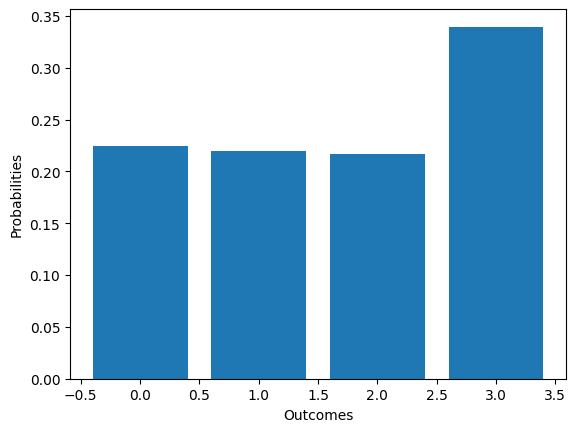

In [19]:
plot_histogram(algorithm_stage1(rho, projectors, 10000))

In [20]:
'''******* NOT REQUIRED *******

# Measurement outcome of hamiltonian for each projective measurement outcome
_energies = []

for P in projectors:
    energy = np.trace( (P * H * P.dag()).full() )
    _energies.append(energy.real)

print(_energies)

standard_outcome_to_energy_outcomes = {0.0:5.0, 1.0:3.0, 2.0:3.0, 3.0:1.0}
standard_outcome_to_energy_outcomes[0.0]

    ******* NOT REQUIRED *******'''

[5.0, 3.0, 3.0, 1.0]


5.0

Pauli Group

In [22]:
# Pauli matrices
I, X, Y, Z = qeye(2), sigmax(), sigmay(), sigmaz()

# Pauli group
pauli_group = []

for op in [I, X, Y, Z]:
    pauli_group.append(op)
    pauli_group.append(-1*op)
    pauli_group.append(1j*op)
    pauli_group.append(-1j*op)

# Algorithm for work extraction

The Algorithm

In [25]:
# stage 2 of algorithm
def algorithm_stage2(density_matrix, hamiltonian, total_iter):
    #TODO: change the outcome of the measurement to corresponding energy outcome
    energy_outcomes = []
    for iteration in range(total_iter):
        if np.random.choice([0, 1]) == 0:
            # outcome, _ = measure(density_matrix, projectors)
            outcome, _ = measure(density_matrix, hamiltonian)
            # energy_outcomes.append(standard_outcome_to_energy_outcomes[outcome])
            energy_outcomes.append(outcome)
        else:
            # measure density matrix 
            _, post_measure_state = measure(density_matrix, projectors)
            u_random = np.random.choice(pauli_group)

            # I_M ⊗ U_r         refer to overleaf document for more details
            u = tensor(qeye(4), u_random)  # currently hard coded. We will change 4 to general dimension
            u = Qobj(u.full()) # converting to np.array and again back to Qobj to match the dimension
            density_matrix = u * post_measure_state * u.dag()
           
            U_gl = qeye(8)      # global unitary
            density_matrix = U_gl * density_matrix * U_gl.dag()

            # measure -H
            outcome, _ = measure(density_matrix, -1*hamiltonian)
            energy_outcomes.append(outcome)
            '''
            NOT REQUIRED
            # outcome, _ = measure(density_matrix, projectors)
            # energy_outcomes.append(-1 * standard_outcome_to_energy_outcomes[outcome])
            
            '''
    return np.array(energy_outcomes)

In [26]:
algorithm_stage2(rho, H, 100000)

extractable_work = np.mean(algorithm_stage2(rho, H, 1000))


for total_iter in [10, 100, 1000, 10000, 100000, 1000000]:
    extractable_work = np.mean(algorithm_stage2(rho, H, total_iter))
    print(f"Total iterations: {total_iter}, Extractable work: {extractable_work}")

Total iterations: 10, Extractable work: 0.2
Total iterations: 100, Extractable work: -0.07
Total iterations: 1000, Extractable work: 0.022
Total iterations: 10000, Extractable work: -0.0017
Total iterations: 100000, Extractable work: -0.00478
Total iterations: 1000000, Extractable work: -4.2e-05


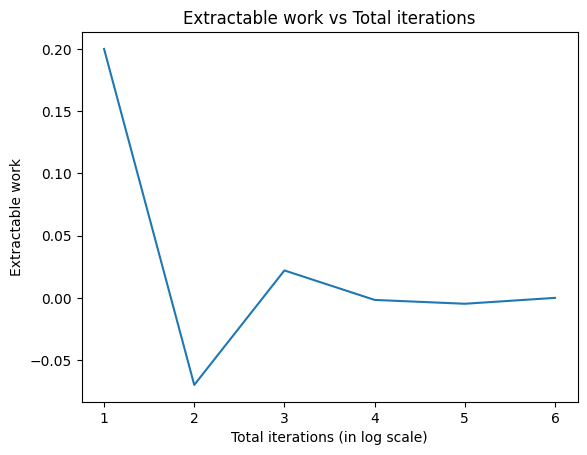

In [28]:
# plot the above outcomes
import matplotlib.pyplot as plt

extractable_works = [0.2, -0.07, 0.022, -0.0017, -0.00478, -4.2e-05]
total_iters = [10, 100, 1000, 10000, 100000, 1000000]

#plot in log scale
plt.plot(np.log10(total_iters), extractable_works)
plt.xlabel("Total iterations (in log scale)")
plt.ylabel("Extractable work")
plt.title("Extractable work vs Total iterations")
plt.show()


In [ ]:
print(np.mean(algorithm_stage2(rho, H, 10000)))

-0.0038
